## Data Preprocessing

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from datetime import datetime
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
tokenizer = ToktokTokenizer()
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

C:\Users\Vishnu Rohan\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
[nltk_data] Downloading package punkt to C:\Users\Vishnu
[nltk_data]     Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vishnu
[nltk_data]     Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Decompress the Amazon Review Dataset

In [6]:
def parse_path(path):
    file = gzip.open(path, 'rb')
    for line in file:
        yield eval(line)
        #the function returns the value that results from evaluating the input string

def getDF(path):
    i = 0
    df = {}
    for d in parse_path(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
    #Constructing dataframe from dictionary by specifying orient='index' to create the dataframe using dictionary keys as rows.

df = getDF("C:\\Users\\Vishnu Rohan\\Downloads\\reviews_Beauty_10.json.gz")

#  Inspect the structure of the dataframe and the basic information of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28798 entries, 0 to 28797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      28798 non-null  object 
 1   asin            28798 non-null  object 
 2   reviewerName    28576 non-null  object 
 3   helpful         28798 non-null  object 
 4   reviewText      28798 non-null  object 
 5   overall         28798 non-null  float64
 6   summary         28798 non-null  object 
 7   unixReviewTime  28798 non-null  int64  
 8   reviewTime      28798 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.2+ MB


Each column represents the following:
    
    1]reviewerID : ID of the reviewer
        
    
    2]asin : ID of the product


    3]reviewerName : name of the reviewer


    4]helpful : helpfulness of the review


    5]reviewText : text of the review


    6]overall : rating


    7]summary : summary of the review


    8]unixReviewTime : (unix time)time of the review 


    9]reviewTime : (raw)time of the review

In [9]:
df.shape

(28798, 9)

In [10]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5.0,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5.0,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5.0,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4.0,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1.0,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [16]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
28793,A3AQHM23X4PCUB,B00L5KTZ0K,Lucas Fauble,"[0, 0]","Although I did receive this product for free, ...",5.0,Moms Approve!,1404950400,"07 10, 2014"
28794,A1NHB2VC68YQNM,B00L5KTZ0K,Nurse Farrugia,"[0, 1]",Smells fresh. Made in USA. Lots of good vitamins!,5.0,Lots of good vitamins!,1405209600,"07 13, 2014"
28795,A1Y3FEUELH3FTI,B00L5KTZ0K,Onlinesalesgirl,"[0, 0]","Nice product, good ingredients, I like the 350...",5.0,Non-Gmo Excellent PhtoCeramide brand,1404604800,"07 6, 2014"
28796,AWHZOUIQ0VO7M,B00L5KTZ0K,Richard N,"[0, 0]",my wife pretty much tries almost every product...,5.0,my wife pretty much tries almost every product...,1405468800,"07 16, 2014"
28797,A2I8KUDXTC9WYI,B00L5KTZ0K,theresa,"[0, 0]",I just started taking this product a few days ...,5.0,So Far So Good.,1404432000,"07 4, 2014"


In [18]:
df.sample(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
22362,A3NHUQ33CFH3VM,B00GLS593S,Citizen John,"[0, 0]",My cousin's wife used this in between coloring...,4.0,Good in-between coloring product to maintain c...,1398470400,"04 26, 2014"
6450,A190EAFTGCQNED,B0057VQ9R0,"Kindle Customer ""Trish""","[0, 0]",My 13-year old daughter uses this product and ...,3.0,"Works, but took a while.",1321574400,"11 18, 2011"
20662,A63GSML234W5B,B00EOP3MJI,J. Al-hashimi,"[0, 0]",Good basic sunblock. Smells nice and not fruit...,5.0,Hydrating,1403136000,"06 19, 2014"
7129,A3DD96LN8U1NM,B005TI7LHS,citygal,"[0, 0]","I like that this is all natural. Normally, I w...",4.0,Okay---will do in an emergency,1325289600,"12 31, 2011"
13571,A1F5O1USOUOOXI,B009YSSLAU,John K.,"[0, 0]",It's tough to find face cream that moisturizes...,5.0,Great face cream,1364342400,"03 27, 2013"
17265,A6QG9LM5WL0AQ,B00AK4QS7A,"C. Irish ""Read On!""","[2, 2]",I have a make-up mirror that has a 15 times ma...,4.0,Great For A Teen,1362614400,"03 7, 2013"
28631,A1J7GMSVITTLFA,B00KQBR9FM,The Overstreet-Roberts Family,"[0, 0]","This product is pretty awesome, and is great f...",4.0,"Pricey, But Worth it!",1405900800,"07 21, 2014"
11127,A1ZU55TM45Y2R8,B007RTR9G0,J. Haggard,"[0, 0]","I had the chance to try this out (I'm a guy), ...",2.0,Greasy and over powering smell,1343260800,"07 26, 2012"
14123,A1OWRLSD7LTSQ9,B00A0IWSN4,"CJ. Stanek ""Creative""","[1, 2]",I also reviewed the conditioner of this same l...,4.0,Suave Professionals Moroccan Infusion Deep Con...,1362355200,"03 4, 2013"
10902,A3VZH0PWLQ9BB1,B007RTR9DS,Tom B.,"[0, 1]",This is for ethnic hair. The marketing is a a ...,4.0,For Ethnic Hair. Not clearly stated though,1346025600,"08 27, 2012"


In [14]:
df['reviewText'][90]

'This is my all time favorite body wash because of its intensely rich lather and fresh pleasing scent. I first discovered it several years ago on a visit to my in-laws. They were in their 70s at the time and recommended this product to me because they said it had really made a difference with their dry skin. I loved the scent when I first opened the bottle. It\'s very fresh, clean, and pleasant smelling without smelling "chemical-ish" or flowery at all. The lather is so rich and creamy that I can\'t compare it to that of any other body wash I\'ve ever tried, and I\'ve tried a lot of them. Every member of my family likes this stuff, from my in-laws to my husband to my kids. I would recommend this to anyone who would like a creamy body wash that makes a lot of lather and has a pleasant scent that men or women will like. I also think it\'s especially good for kids and older adults who have issues with dry skin.'

In [15]:
df['summary'][90]

'All Time Favorite'

In [19]:
df.describe()

,overall,unixReviewTime
count,28798.000000,2.879800e+04
mean,4.168137,1.362445e+09
std,0.993920,4.214377e+07
min,1.000000,1.113350e+09
25%,4.000000,1.351123e+09
50%,4.000000,1.366070e+09
75%,5.000000,1.395274e+09
max,5.000000,1.406074e+09


In [20]:
df['overall'][df['overall']<1].sum()

0.0

In [21]:
df['overall'][df['overall']>5].sum()

0.0

We can observe that there is no rating out of defined 1-5 range.


Let's see how many customers give ratings for each category.

In [22]:
# Customer totals for each rating 
df['overall'].value_counts()

5.0    13766
4.0     8808
3.0     4110
2.0     1528
1.0      586
Name: overall, dtype: int64

In [23]:
# Check for missing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      222
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

# From the above steps we know the following details about the data:
    
    
    1] We should change the name of columns to something more meaningful and convenient 
    
    
    2] The shape of the data: 28798 rows * 9 columns.
        
        
    3] We have few missing values in teh reviewerName column which we have to deal with.
    
    
    4]We have to deal with the reviewText column and summary column since both of them are giving us the same information.
    
    
    5]We should handle helpful coulmn by diving it into two columns which gives us information about postive feed back and negative feedback.
    
    
    6]We should handle the overall column by classify the data into good and bad columns.
    
    
    7]The reviewTime column needs to be converted to datetime data type and drop reviewerName since reviewerID is a better unique identifier for us in this case.

# Dropping Missing Values

In [32]:
# Drop missing customers who don't give their names and calculating the customer totals for each rating
dataframe = df.dropna(axis=0)
dataframe['overall'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: overall, dtype: int64

In [33]:
# Concatenating 'reviewText' and 'summary' as review_text and drop then dropping both the columns.
dataframe['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
dataframe = dataframe.drop(['reviewText', 'summary'], axis = 1)
dataframe.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...


# Spliting the  'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it after, so that it would be easier for us to give them as input to our models.

In [34]:
list_pos = []
list_neg = []
# giving the input to list_pos and list_neg from the helpful coulmn based on the value of the the data for each record.
for val in dataframe['helpful']:
    list_pos.append(val[0])
    list_neg.append(val[1] - val[0])
#creating new columns to store this data.    
dataframe['pos_feedback'] = list_pos
dataframe['neg_feedback'] = list_neg

dataframe = dataframe.drop('helpful', axis = 1)
dataframe.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0


# Classifying  the 'overall' column as good and bad and adding a new column reflecting the changes and dropping the overall column.


In [35]:
good_rate = len(dataframe[dataframe['overall'] > 3])
bad_rate = len(dataframe[dataframe['overall'] <= 3])

print ('Good ratings : {} reviews for beauty products'.format(good_rate))
print ('Bad ratings : {} reviews for beauty products'.format(bad_rate))

Good ratings : 22425 reviews for beauty products
Bad ratings : 6151 reviews for beauty products


In [36]:
dataframe['rating_class'] = dataframe['overall'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'bad'))
dataframe.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


In [37]:
dataframe= dataframe.drop(['reviewerName', 'unixReviewTime'], axis = 1)
dataframe.head()

,reviewerID,asin,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,5.0,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,5.0,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,4.0,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,1.0,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


# Changing the Time format

In [38]:
# Convert time object to datetime and create a new column named 'time' and dropping the reviewTime column
dataframe['time'] = dataframe.reviewTime.str.replace(',', "")
dataframe['time'] = pd.to_datetime(dataframe['time'], format = '%m %d %Y')
dataframe = dataframe.drop('reviewTime', axis = 1)
dataframe.head()

,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21


# Renaming the columns

In [40]:
dataframe.columns = ['customer', 'product', 'rating', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class', 'time']
dataframe.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21


# Further analysis of data

In [41]:
dataframe.describe()

,rating,pos_feedback,neg_feedback
count,28576.000000,28576.000000,28576.000000
mean,4.170493,0.948488,0.324888
std,0.992277,6.829651,1.105870
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,549.000000,52.000000


In [50]:
# Number of unique customers, products and unique review per unique customer and per unique prouct:

print('Number of unique customers : {}'.format(len(dataframe['customer'].unique())))
print('Number of unique products : {}'.format(len(dataframe['product'].unique())))
print('Review per customer: {}'.format((len(dataframe)/len(dataframe['customer'].unique()))))      
print('Review per product: {}'.format((len(dataframe)/len(dataframe['product'].unique()))))   

Number of unique customers : 1340
Number of unique products : 733
Review per customer: 21.32537313432836
Review per product: 38.9849931787176


In [44]:
# Customer totals for each rating and rating class
print(dataframe['rating'].value_counts())
print(dataframe['rating_class'].value_counts())

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: rating, dtype: int64
good    22425
bad      6151
Name: rating_class, dtype: int64


In [47]:
# The number of positive , negative and not useful feedbacks present in the data
pos = len(dataframe[dataframe['pos_feedback'] > 0])
neg = len(dataframe[dataframe['neg_feedback'] > 0]) 
print('Number of positive feedbacks: {}'.format(pos))
print('Number of negative feedbacks: {}'.format(neg))
total = len(dataframe)
print('Number of not useful feedbacks: {}'.format(total - (pos + neg)))

Number of positive feedbacks: 8397
Number of negative feedbacks: 6078
Number of not useful feedbacks: 14101


The above data gives us details on the standard deviation in the rating status and the number of customers in each rating scale. There are on an average 40 reviews for each product in the website and each customer on an average has 21 reviews for products. We have 14101 not useful feedbacks present in the data and the rest are either positive or negative. Let us perform some EDA to find outliers in the data.


# Preprocessing the text

In [52]:
!pip install contractions

In [53]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
} 

# Removing HTML tags  because does not add much value towards understanding and analyzing text.

In [54]:
def remove_html_tags(text): 
    soup = BeautifulSoup(text, "html.parser")
    strip_text = soup.get_text()
    return strip_text

# Removing accented characters and coverting the characters into ASCII characters.

In [55]:
def stand_accented_chars(text):   
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Expanding Contractions to orginal form in order to help with text standardization.

In [56]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Removing Special Characters

In [57]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

# Lemmatization

We will remove word affixes to get to the base form of a word, known as root word.

In [59]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# Removing stopwords

In [61]:
# Create stopword list
stopword_list = nltk.corpus.stopwords.words('english')

# 'Since no' and 'not' may give us information and change the entire context of a sentence we remove them from the stopwords list
stopword_list.remove('no')
stopword_list.remove('not')

In [62]:
def remove_stopwords(text, is_lower_case=False):

    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

 # Building a Text Normalizer which implements all the above functions

In [63]:
def normalize_corpus(doc, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
     
    # strip HTML
    if html_stripping:
        doc = remove_html_tags(doc)
            
    # remove accented characters
    if accented_char_removal:
        doc = stand_accented_chars(doc)
            
    # expand contractions    
    if contraction_expansion:
        doc = expand_contractions(doc)
            
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
            
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
            
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
            
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
        
    # remove ' (apostrophe) sign
    doc = re.sub(r"'", r'', doc)
        
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
    return doc

# Applying text normalizer to "review_text"

In [64]:
len(dataframe['review_text'])

28576

In [67]:
dataframe['review_text']

0        If I had to choose only one product to take ca...
1        Makes my skin lovely and smooth As a woman nea...
2        Works well at a reasonable price I've used thi...
3        This does work ladies I have tried so many pro...
4        Did not like the feel/texture of this serum I ...
                               ...                        
28793    Moms Approve! Although I did receive this prod...
28794    Lots of good vitamins! Smells fresh. Made in U...
28795    Non-Gmo Excellent PhtoCeramide brand Nice prod...
28796    my wife pretty much tries almost every product...
28797    So Far So Good. I just started taking this pro...
Name: review_text, Length: 28576, dtype: object

In [65]:
dataframe['clean_text'] = dataframe['review_text'].map(lambda doc: normalize_corpus(doc))

In [66]:
dataframe['clean_text']

0        choose one product take care face rest life wo...
1        make skin lovely smooth woman near need help g...
2        work well reasonable price use regenerating se...
3        work lady try many product totally disappointe...
4        not like feel texture serum love oil olay prim...
                               ...                        
28793    mom approve although receive product free not ...
28794    lot good vitamin smell fresh make usa lot good...
28795    non gmo excellent phtoceramide brand nice prod...
28796    wife pretty much try almost every product figh...
28797    far good start take product day ago since star...
Name: clean_text, Length: 28576, dtype: object

# Applying tokenizer to create tokens for the clean text

In [68]:
# Apply tokenizer to create a new column named as tokens which consists of the list of the reviews
tokenizer = RegexpTokenizer(r'\w+')
dataframe["tokens"] = dataframe["clean_text"].apply(tokenizer.tokenize)
dataframe.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"[choose, one, product, take, care, face, rest,..."
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"[make, skin, lovely, smooth, woman, near, need..."
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"[work, well, reasonable, price, use, regenerat..."
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13,work lady try many product totally disappointe...,"[work, lady, try, many, product, totally, disa..."
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21,not like feel texture serum love oil olay prim...,"[not, like, feel, texture, serum, love, oil, o..."


In [70]:
# Tokens status
all_tokens = [word for tokens in dataframe["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in dataframe["tokens"]]
vocabulary = sorted(list(set(all_tokens)))
print("%s words total, with a vocabulary size of %s" % (len(all_tokens), len(vocabulary)))
print("Maximum review length is (word based) %s" % max(sentence_lengths))
print("Minimum review length is (word based) %s" % min(sentence_lengths))

2024818 words total, with a vocabulary size of 27739
Maximum review length is (word based) 1090
Minimum review length is (word based) 1


# Write dataframe to CSV file

In [71]:
dataframe.to_csv('cleaned_data_review.csv', sep = ',', encoding = 'utf-8', index = False)

### Reading the Cleaned Dataset

In [72]:
# Read the file
dataframe = pd.read_csv('cleaned_data_review.csv')

### Inspecting the dataset

In [75]:
dataframe.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"['choose', 'one', 'product', 'take', 'care', '..."
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"['make', 'skin', 'lovely', 'smooth', 'woman', ..."
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"['work', 'well', 'reasonable', 'price', 'use',..."
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13,work lady try many product totally disappointe...,"['work', 'lady', 'try', 'many', 'product', 'to..."
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21,not like feel texture serum love oil olay prim...,"['not', 'like', 'feel', 'texture', 'serum', 'l..."


In [76]:
dataframe.tail()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
28571,A3AQHM23X4PCUB,B00L5KTZ0K,5.0,Moms Approve! Although I did receive this prod...,0,0,good,2014-07-10,mom approve although receive product free not ...,"['mom', 'approve', 'although', 'receive', 'pro..."
28572,A1NHB2VC68YQNM,B00L5KTZ0K,5.0,Lots of good vitamins! Smells fresh. Made in U...,0,1,good,2014-07-13,lot good vitamin smell fresh make usa lot good...,"['lot', 'good', 'vitamin', 'smell', 'fresh', '..."
28573,A1Y3FEUELH3FTI,B00L5KTZ0K,5.0,Non-Gmo Excellent PhtoCeramide brand Nice prod...,0,0,good,2014-07-06,non gmo excellent phtoceramide brand nice prod...,"['non', 'gmo', 'excellent', 'phtoceramide', 'b..."
28574,AWHZOUIQ0VO7M,B00L5KTZ0K,5.0,my wife pretty much tries almost every product...,0,0,good,2014-07-16,wife pretty much try almost every product figh...,"['wife', 'pretty', 'much', 'try', 'almost', 'e..."
28575,A2I8KUDXTC9WYI,B00L5KTZ0K,5.0,So Far So Good. I just started taking this pro...,0,0,good,2014-07-04,far good start take product day ago since star...,"['far', 'good', 'start', 'take', 'product', 'd..."


In [77]:
# Basic Information about the Data Set
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28576 entries, 0 to 28575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer      28576 non-null  object 
 1   product       28576 non-null  object 
 2   rating        28576 non-null  float64
 3   review_text   28576 non-null  object 
 4   pos_feedback  28576 non-null  int64  
 5   neg_feedback  28576 non-null  int64  
 6   rating_class  28576 non-null  object 
 7   time          28576 non-null  object 
 8   clean_text    28576 non-null  object 
 9   tokens        28576 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.2+ MB


# Exploratory Data Analysis

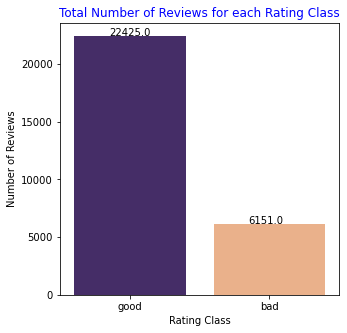

In [87]:
# Total numbers of ratings in the beauty product reviews
plt.figure(figsize = (5,5))
ax= sns.countplot(x = dataframe['rating_class'] , palette=['#432371',"#FAAE7B"])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Total Number of Reviews for each Rating Class', color='b')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()


* We diminished those 5 rating categories into two categories such as 'good' and 'bad' in order to implement a sentiment analysis on their reviews. 

* According to those reviews, 22425 of them are classified as good, amd the rest 6151 are bad.

# Features present in the data

1. Year Feature : let us analyse how rating classes change for each year

In [88]:
dataframe['year'] = pd.DatetimeIndex(dataframe['time']).year
dataframe['year']

0        2009
1        2013
2        2011
3        2005
4        2013
         ... 
28571    2014
28572    2014
28573    2014
28574    2014
28575    2014
Name: year, Length: 28576, dtype: int64

In [89]:
a = dataframe.groupby('year')
a.count()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
year,,,,,,,,,,
2005,1,1,1,1,1,1,1,1,1,1
2007,44,44,44,44,44,44,44,44,44,44
2008,674,674,674,674,674,674,674,674,674,674
2009,892,892,892,892,892,892,892,892,892,892
2010,787,787,787,787,787,787,787,787,787,787
2011,836,836,836,836,836,836,836,836,836,836
2012,4649,4649,4649,4649,4649,4649,4649,4649,4649,4649
2013,11269,11269,11269,11269,11269,11269,11269,11269,11269,11269
2014,9424,9424,9424,9424,9424,9424,9424,9424,9424,9424


In [94]:
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

dataframe['rating_class_num'] = dataframe['rating_class'].map({'good': 1, 'bad': 0})
    
feature_year = dataframe.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature_year.columns = [' '.join(col).strip() for col in feature_year.columns.values]
feature_year = feature_year.reset_index()
feature_year['rating_class_num mean'] = feature_year['rating_class_num mean']*100
feature_year.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature_year['% of Relevant Rating in the Total'] = (feature_year['Relevant Rating Number'] / 22425)*100
        
feature_year

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2005,1,1,100.000000,0.004459
1,2007,44,28,63.636364,0.124861
2,2008,674,491,72.848665,2.189521
3,2009,892,654,73.318386,2.916388
4,2010,787,578,73.443456,2.577480
5,2011,836,578,69.138756,2.577480
6,2012,4649,3736,80.361368,16.659978
7,2013,11269,8644,76.706008,38.546265
8,2014,9424,7715,81.865450,34.403567


<Figure size 432x432 with 0 Axes>

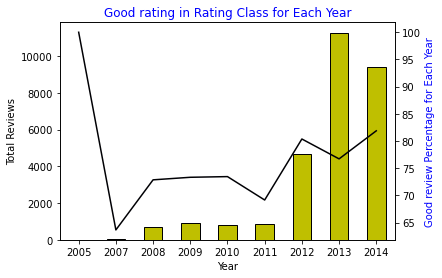

In [136]:
# Create a graph for each rating class to compare within the years
plt.figure(figsize = (6,6))
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
feature_year.set_index(feature_year['Year'], drop=True, inplace=True)
feature_year["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, color= 'y', rot=0, edgecolor='black')
feature_year['% of Relevant Rating Number in This Year'].plot(use_index = False, kind = 'line', ax = ax2, colormap='inferno')   
plt.title('Good rating in Rating Class for Each Year', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good review Percentage for Each Year")
ax1.yaxis.label.set_color('black')
ax1.xaxis.label.set_color('black')
ax2.yaxis.label.set_color('blue')
plt.show()  

After 2011, good ratings' percentage is progressing over 80%. Before 2012, only 2009 also shows a slight increase in good ratings and a decline from 2010 to 2011. Besides those, 2007 has the lowest good ratings with less than 65% overall. As it might be seen in the graph, the overall good rating is progressing between 60% and 85% in beauty products.

## 2. Customer Feature

**Unique Customers**

In [14]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(dataframe['customer'].unique())))

Number of unique customers: 1340


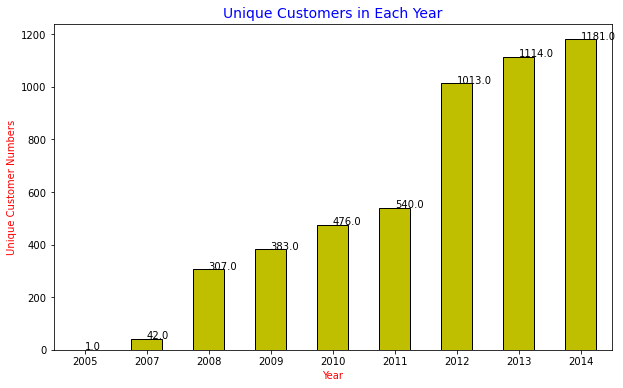

In [131]:
# How many unique customers in each year?
feature_unique_cus = dataframe.groupby('year')['customer'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
ax = feature_unique_cus.plot(kind='bar', rot = 0, color='y' , edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Unique Customers in Each Year', color='b', size = 14)
plt.xlabel('Year',color = 'r')
plt.ylabel('Unique Customer Numbers',color = 'r')
plt.show()



**How many unique customers do we have in each rating class?**

In [118]:
# unique customers for each "rating class"
cus = list(dataframe.groupby(['rating_class'])['customer'].unique())  
# number of customers
no_cus = [len(cus[0]),len(cus[1])] 
print(no_cus)
# number of reviews for each "rating class"
no_rev = list(dataframe['rating_class'].value_counts())              
print(no_rev)
unique_cus_rate = pd.DataFrame({'rating_class': ['bad', 'good'],'number_of_customers': no_cus,'number_of_reviews': sorted(no_rev)})
print(unique_cus_rate)

[1090, 1340]
[22425, 6151]
  rating_class  number_of_customers  number_of_reviews
0          bad                 1090               6151
1         good                 1340              22425


We have total 1340 unique customers who gave good reviews and 747 customers who gave bad reviews in the dataset. As it may be observed in the chart and table, the number of unique customers for each year has increased with the progress of the year.

## 3. Product Feature¶

In [119]:
# Printing number of unique beauty products
print('Number of unique beauty products: {}'.format(len(dataframe['product'].unique())))

Number of unique beauty products: 733


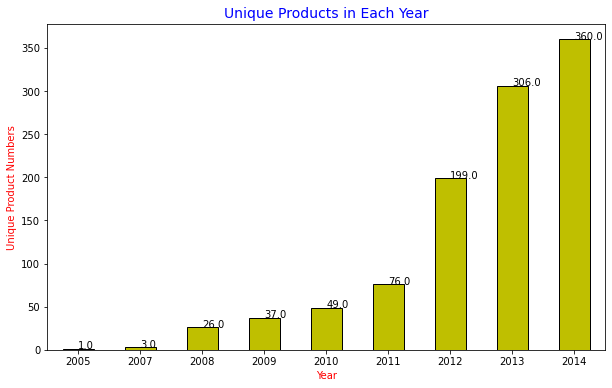

In [130]:
# Unique products by year?
unique_prod_byyear = dataframe.groupby('year')['product'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
ax = unique_prod_byyear.plot(kind='bar', rot =0, color='y' , edgecolor='black' )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Unique Products in Each Year', color = 'b', size = 14)
plt.xlabel('Year',color = 'r')
plt.ylabel('Unique Product Numbers',color = 'r')
plt.show()

* The number of unique products for each year has increased with the year.

# 4. Review Length Feature

In [124]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
dataframe['review_length'] = dataframe['review_text'].apply(length)
dataframe.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens,year,rating_class_num,review_length
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"['choose', 'one', 'product', 'take', 'care', '...",2009,1,252
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"['make', 'skin', 'lovely', 'smooth', 'woman', ...",2013,1,75
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"['work', 'well', 'reasonable', 'price', 'use',...",2011,1,76
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13,work lady try many product totally disappointe...,"['work', 'lady', 'try', 'many', 'product', 'to...",2005,1,82
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21,not like feel texture serum love oil olay prim...,"['not', 'like', 'feel', 'texture', 'serum', 'l...",2013,0,98


In [137]:
# Create review length bin feature
dataframe['review_length_bin'] = pd.cut(dataframe['review_length'], np.arange(0,500,50))
dataframe.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens,year,rating_class_num,review_length,review_length_bin
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"['choose', 'one', 'product', 'take', 'care', '...",2009,1,252,"(250, 300]"
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"['make', 'skin', 'lovely', 'smooth', 'woman', ...",2013,1,75,"(50, 100]"
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"['work', 'well', 'reasonable', 'price', 'use',...",2011,1,76,"(50, 100]"
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13,work lady try many product totally disappointe...,"['work', 'lady', 'try', 'many', 'product', 'to...",2005,1,82,"(50, 100]"
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21,not like feel texture serum love oil olay prim...,"['not', 'like', 'feel', 'texture', 'serum', 'l...",2013,0,98,"(50, 100]"


In [138]:
# Good rating percentages for each length bin with 50's
per_pos_length = dataframe.groupby(['review_length_bin'])['rating_class_num'].mean()
dataframe['review_length_bin'] =dataframe.review_length_bin.astype(str)

per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 50]       90.616531
(50, 100]     82.390810
(100, 150]    76.390346
(150, 200]    74.432470
(200, 250]    73.288749
(250, 300]    73.092369
(300, 350]    72.591006
(350, 400]    72.021661
(400, 450]    72.295515
Name: rating_class_num, dtype: float64

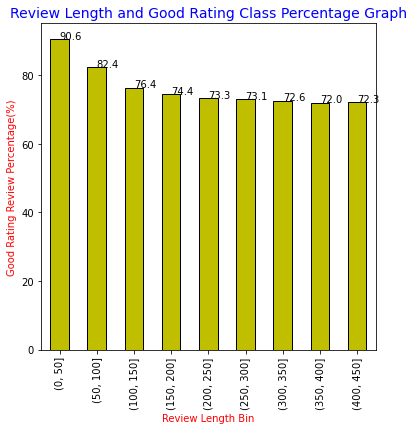

In [174]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (6,6))
ax = per_pos_length.plot(kind='bar', color='y' , edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Review Length and Good Rating Class Percentage Graph', color = 'b', size = 14)
plt.xlabel('Review Length Bin',color = 'r')
plt.ylabel('Good Rating Review Percentage(%)',color = 'r')
plt.show()

* The highest percentage of good rating reviews lies between 0-50 words whereas lowest percentage of good rating reviews lies between 400-450 words. 

* The customers who have complains about the products are more willingly to write longer reviews than other customers who are satisfied with company's products. 

* From the graph, we can see that when the review length is between 0 to 50 bin, the good rating percentage is the highest at 90.4%. And when the length of the review is between 350- 400 bin the good rating percentage is 72.0% and 400-450 bin having 72.3.  So we can conclude that when the length of the review increases, the good rating percentage decreases slightly. The difference between a good review with shortest length and a good review with longest length is 18.3%. So insightfully, customers have written longer reviews when they are displeased with their purchase. 

**Correlation Between Numeric Variables**

<Figure size 432x288 with 0 Axes>

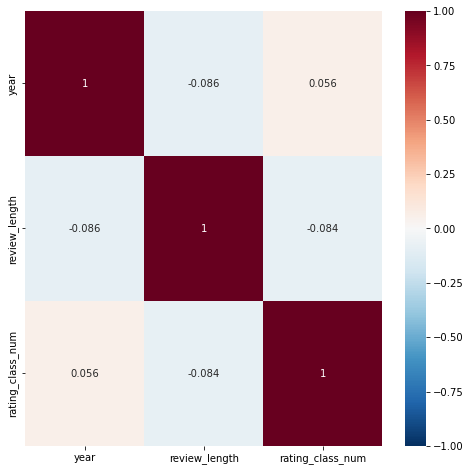

In [145]:
# Plotting correlation matrix between numeric variables
corr = dataframe[['year','review_length', 'rating_class_num']].corr(method="pearson")
fig3 = plt.figure()
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

* We can see that there is no strong correlation between any two numeric variables. 

# 5. Text Review Feature

* We will create a new data frame with clean text and rating class
* Then we will initialize the countervectorizer and fit the 'clean_text' to countvectorizer and then transform the matrix and convert it to array

In [147]:
df = dataframe[["clean_text", "rating_class_num"]]
df.head()

,clean_text,rating_class_num
0,choose one product take care face rest life wo...,1
1,make skin lovely smooth woman near need help g...,1
2,work well reasonable price use regenerating se...,1
3,work lady try many product totally disappointe...,1
4,not like feel texture serum love oil olay prim...,0


In [148]:
countVec = CountVectorizer(binary=True)

In [149]:
countVec.fit(df["clean_text"])

CountVectorizer(binary=True)

In [150]:
transformed_matrix = countVec.transform(df["clean_text"])

In [151]:
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
# Extracting the feature names
names = countVec.get_feature_names()

In [154]:
# Adding a 'rating' column from previous dataframe's rating value
df2= pd.DataFrame(transformed_matrix.toarray(), columns=names)
df2['rating'] = df['rating_class_num']

In [155]:
# Creating lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df2[df2[name]== 1]['rating'].mean()
        rating_count = df2[df2[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [157]:
# Creating a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})

In [158]:
df_summary

,feature_name,avg_rating,rating_count
0,______________________________________________...,0.0,1
1,_____________________________________________i,0.0,1
2,________________________________________product,1.0,1
3,_____________________addendum,1.0,1
4,_______update,0.0,1
...,...,...,...
27714,zwillig,0.0,1
27715,zwilling,0.5,8
27716,zync,1.0,1
27717,zz,1.0,1


**Good rating words which are commonly used in the reviews which have good ratings**

In [159]:
df_good = df_summary.query("rating_count > 100").sort_values(by='avg_rating', ascending=False)[:150]

In [160]:
df_good

,feature_name,avg_rating,rating_count
20553,rosehip,1.000000,105
21543,shany,0.984615,195
12193,instanatural,0.983871,186
410,adovia,0.979920,249
17283,palette,0.973856,153
...,...,...,...
27420,worried,0.852713,129
26450,vibrant,0.852564,156
22352,soften,0.852500,400
21366,serum,0.852449,1674


In [161]:
wordcloud_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

In [162]:
!pip install wordcloud

In [163]:
from wordcloud import WordCloud, STOPWORDS

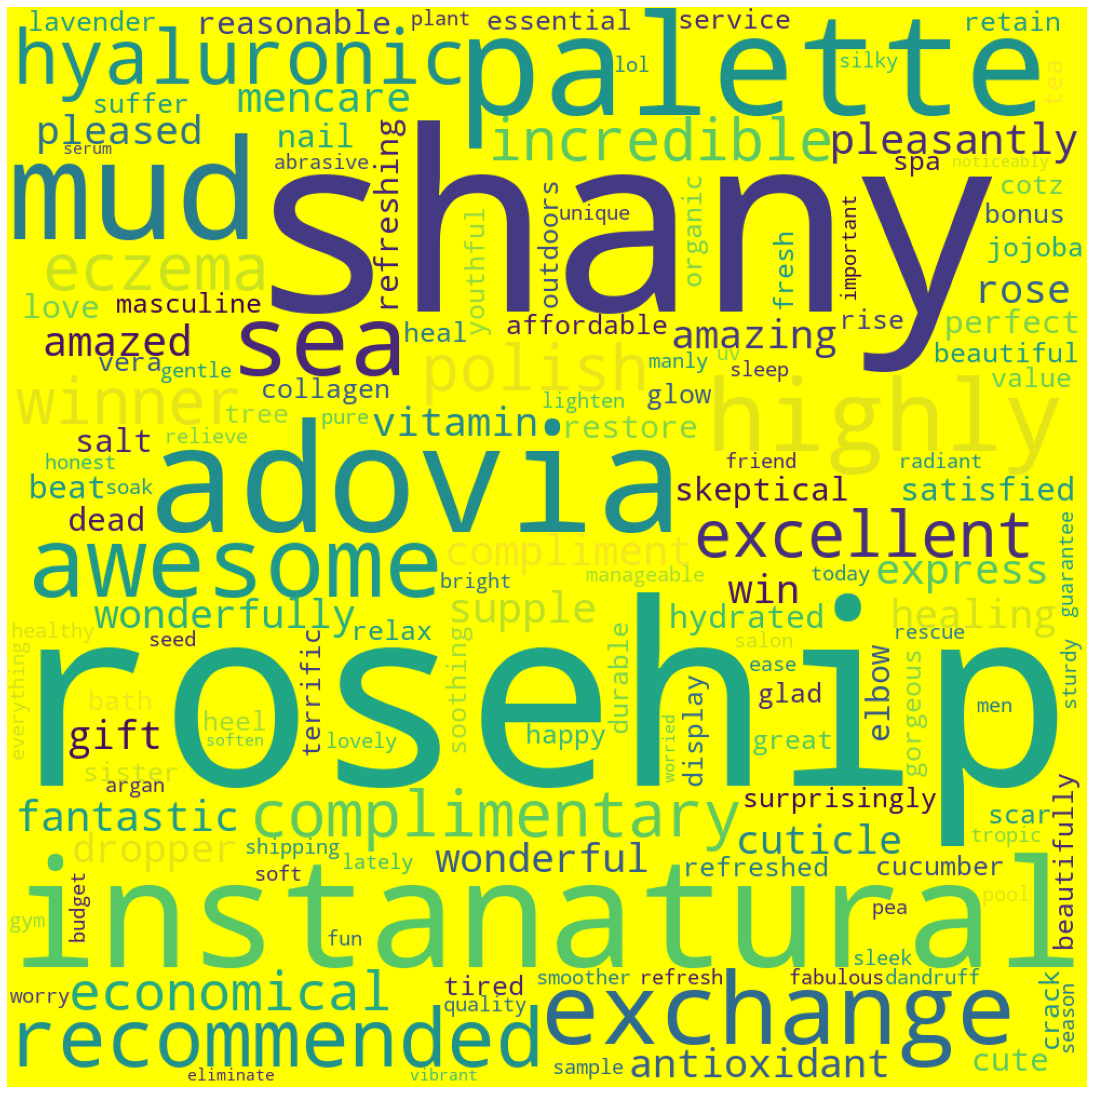

In [168]:
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='yellow',
                min_font_size = 10).generate_from_frequencies(wordcloud_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Bad rating words**

In [169]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 100").sort_values(by= 'avg_rating', ascending=True)[:150]

In [170]:
df_bad

,feature_name,avg_rating,rating_count
6667,disappointing,0.139130,115
20698,sadly,0.330357,112
25683,unfortunately,0.332215,596
22495,sorry,0.358108,148
6666,disappointed,0.380471,297
...,...,...,...
21293,sense,0.663082,279
10385,gritty,0.663551,107
21208,section,0.664311,283
19799,regenerist,0.664671,167


In [171]:
wordcloud_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

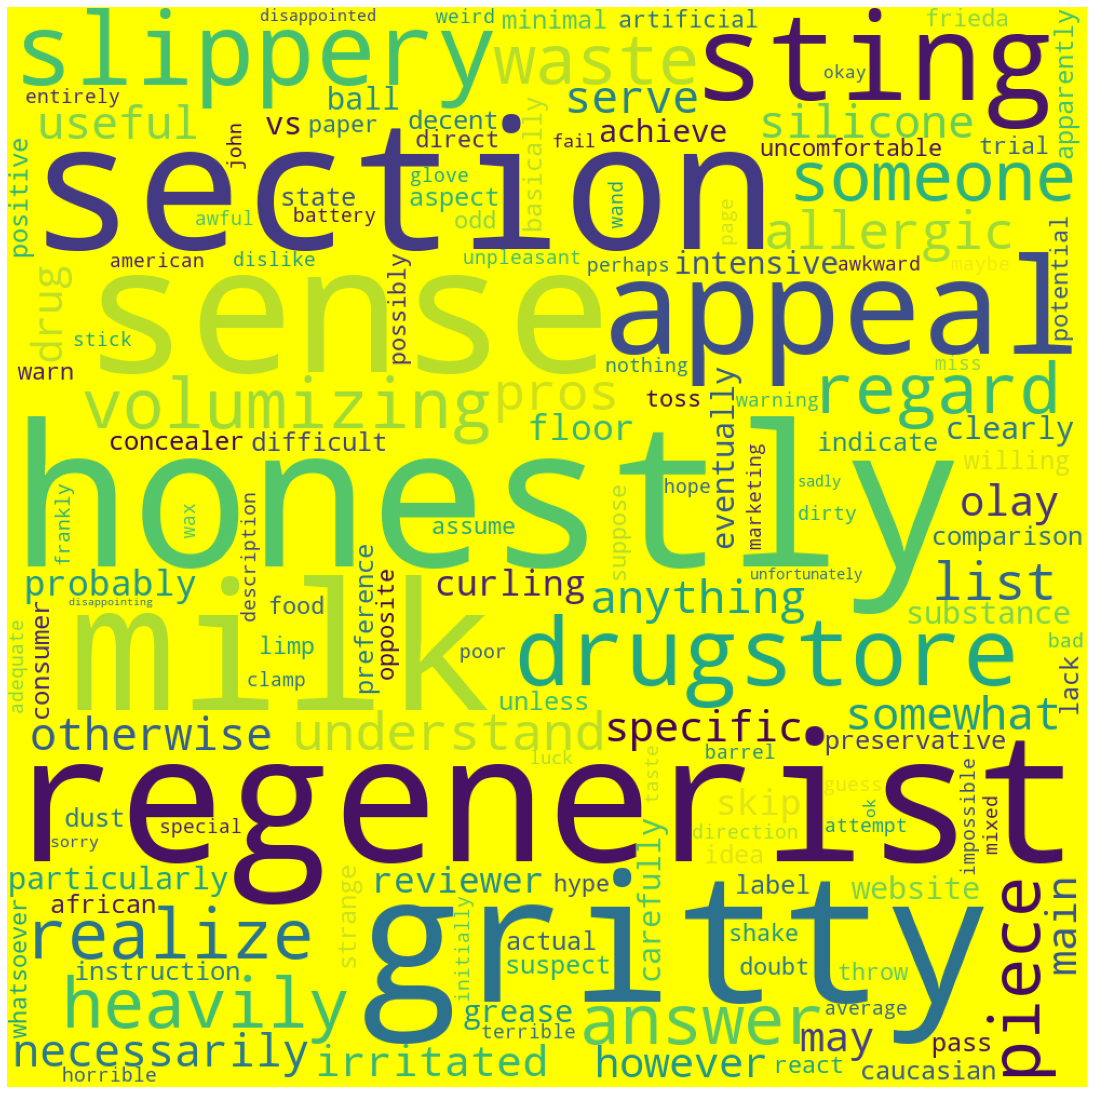

In [173]:
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='yellow',
                min_font_size = 10).generate_from_frequencies(wordcloud_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# EDA Summary:

*  We diminished those 5 rating categories into two categories like 22425 of them  are classified as good, whereas the rest of them are bad.

*  As it might be seen in the graph, the overall good rating is progressing between 85% and 93% in beauty products.

*  There is no strong correlation between any two numeric variables.

*  If we compare the review length and good/bad categories, the highest percentage of good rating reviews lies between 0-50 bin with 96.4% whereas lowest percentage of good rating reviews lies between 400-450 bin with 88.3%.

* As the review length extends, the good rating tends to decrease slightly. The customers who have complains about the products are more willingly to write longer reviews than other customers who are satisfied with company's products.

*  The most common words used to reflect good and bad sentiments are shown above and we may extract insights from each categories' words.